In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_one_hot = pd.get_dummies(insurance)

In [4]:
# Create x & y values
y = insurance_one_hot["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [5]:
x = insurance_one_hot.drop("charges",axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
tf.random.set_seed(42)

In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [10]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 2ms/step - loss: 8750.0928 - mae: 8750.0928
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.1045 - mae: 7875.1045
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7604.2236 - mae: 7604.2236
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.7349 - mae: 7652.7349
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7687.1763 - mae: 7687.1763
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.3413 - mae: 7608.3413
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7593.8081 - mae: 7593.8081
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7787.3252 - mae: 7787.3252
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7504.1040 - mae: 7504.1040
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7767.5508 - mae: 7767.5508

34/34 [==============================] - 0s 1ms/step - loss: 7206.3096 - mae: 7206.3096
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 7415.4668 - mae: 7415.4668
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7194.3545 - mae: 7194.3545
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7376.8530 - mae: 7376.8530
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7506.6582 - mae: 7506.6582
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7303.1069 - mae: 7303.1069
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7321.0889 - mae: 7321.0889
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 7288.3540 - mae: 7288.3540
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 7109.3340 - mae: 7109.3340
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 7342.1616 - mae: 7342.1616
Epo

In [11]:
model.predict(x_test)

array([[12633.939 ],
       [ 8081.142 ],
       [20859.277 ],
       [13231.065 ],
       [ 6852.7505],
       [ 8071.7974],
       [ 3541.1953],
       [16734.902 ],
       [ 6372.7095],
       [14048.472 ],
       [11387.192 ],
       [10755.766 ],
       [ 6511.873 ],
       [15875.271 ],
       [18827.908 ],
       [15823.298 ],
       [12895.273 ],
       [15450.886 ],
       [12159.988 ],
       [13988.242 ],
       [ 7475.619 ],
       [11172.332 ],
       [ 3913.0508],
       [ 5446.0327],
       [14475.513 ],
       [14021.794 ],
       [15524.799 ],
       [ 7009.8887],
       [13208.888 ],
       [ 3896.316 ],
       [11581.298 ],
       [14851.558 ],
       [ 4850.877 ],
       [ 8387.1045],
       [ 5679.458 ],
       [10611.811 ],
       [ 4554.5376],
       [10821.661 ],
       [17655.803 ],
       [11863.415 ],
       [ 6220.745 ],
       [ 5120.419 ],
       [14746.265 ],
       [15792.683 ],
       [ 8056.606 ],
       [16122.448 ],
       [ 5625.872 ],
       [ 6382

In [12]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6864.0483 - mae: 6864.0483


[6864.04833984375, 6864.04833984375]

In [13]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [14]:
# Model 2
tf.random.set_seed(42)

In [15]:
model_2 = tf.keras.Sequential([
           tf.keras.layers.Dense(100),
           tf.keras.layers.Dense(10),
           tf.keras.layers.Dense(1)
            ])

In [16]:
model_2.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

In [17]:
model_2.fit(x_train,y_train,epochs=200)
history = model_2.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5834.3071 - mae: 5834.3071
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 5711.3481 - mae: 5711.3481
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 5600.6650 - mae: 5600.6650
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 5523.6187 - mae: 5523.6187
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3725.0784 - mae: 3725.0784
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3722.1680 - mae: 3722.1680
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3726.4905 - mae: 3726.4905
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3717.1106 - mae: 3717.1106
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3721.8945 - mae: 3721.8945
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3720.7312 - mae: 3720.7312
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3715.3096 - mae: 3715.3096
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3714.2400 - mae: 3714.2400
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3708.1538 - mae: 3708.1538
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3707.5681 - mae: 3707

Epoch 43/200
34/34 [==============================] - 0s 2ms/step - loss: 3591.6458 - mae: 3591.6458
Epoch 44/200
34/34 [==============================] - 0s 2ms/step - loss: 3588.6494 - mae: 3588.6494
Epoch 45/200
34/34 [==============================] - 0s 2ms/step - loss: 3580.8318 - mae: 3580.8318
Epoch 46/200
34/34 [==============================] - 0s 2ms/step - loss: 3583.6145 - mae: 3583.6145
Epoch 47/200
34/34 [==============================] - 0s 2ms/step - loss: 3586.0791 - mae: 3586.0791
Epoch 48/200
34/34 [==============================] - 0s 2ms/step - loss: 3578.2803 - mae: 3578.2803
Epoch 49/200
34/34 [==============================] - 0s 2ms/step - loss: 3588.8333 - mae: 3588.8333
Epoch 50/200
34/34 [==============================] - 0s 2ms/step - loss: 3579.7466 - mae: 3579.7466
Epoch 51/200
34/34 [==============================] - 0s 2ms/step - loss: 3575.9617 - mae: 3575.9617
Epoch 52/200
34/34 [==============================] - 0s 2ms/step - loss: 3583.9785 - mae: 

34/34 [==============================] - 0s 2ms/step - loss: 3491.2803 - mae: 3491.2803
Epoch 124/200
34/34 [==============================] - 0s 2ms/step - loss: 3480.7461 - mae: 3480.7461
Epoch 125/200
34/34 [==============================] - 0s 2ms/step - loss: 3487.3718 - mae: 3487.3718
Epoch 126/200
34/34 [==============================] - 0s 3ms/step - loss: 3487.0396 - mae: 3487.0396
Epoch 127/200
34/34 [==============================] - 0s 1ms/step - loss: 3486.4451 - mae: 3486.4451
Epoch 128/200
34/34 [==============================] - 0s 2ms/step - loss: 3486.8838 - mae: 3486.8838
Epoch 129/200
34/34 [==============================] - 0s 3ms/step - loss: 3502.5271 - mae: 3502.5271
Epoch 130/200
34/34 [==============================] - 0s 4ms/step - loss: 3495.6680 - mae: 3495.6680
Epoch 131/200
34/34 [==============================] - 0s 2ms/step - loss: 3483.7373 - mae: 3483.7373
Epoch 132/200
34/34 [==============================] - 0s 2ms/step - loss: 3483.0649 - mae: 3483

In [18]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3160.4255 - mae: 3160.4255


[3160.425537109375, 3160.425537109375]

In [19]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 6864.0483 - mae: 6864.0483


[6864.04833984375, 6864.04833984375]

Text(0.5, 0, 'epochs')

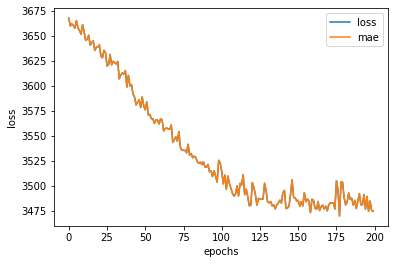

In [20]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel("epochs")

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [22]:
insurance = pd.read_csv("insurance.csv")
insurance

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create x & y
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [23]:
# Create x & y
x = insurance.drop("charges",axis=1)
y = insurance["charges"]

In [24]:
# Build our train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [26]:
# Transform trai`
x_train_normal= ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [27]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [28]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [30]:
x_train.shape,x_train_normal.shape

((1070, 6), (1070, 11))

In [33]:
# Build neural network
tf.random.set_seed(42)

# Create a model
model_normal = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

In [35]:
# Compile the model
model_normal.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=("mae"))

In [38]:
# Fit the model
model_normal.fit(x_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13339.4785 - mae: 13339.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13325.8730 - mae: 13325.8730
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13284.3896 - mae: 13284.3896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13156.0547 - mae: 13156.0547
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12756.2744 - mae: 12756.2744
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11604.6348 - mae: 11604.6348
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 9815.3799 - mae: 9815.3799
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8611.2627 - mae: 8611.2627
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 8165.9160 - 

34/34 [==============================] - 0s 2ms/step - loss: 3486.6611 - mae: 3486.6611
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3495.8215 - mae: 3495.8215
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3480.0288 - mae: 3480.0288
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3485.9910 - mae: 3485.9910
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3483.8474 - mae: 3483.8474
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.1558 - mae: 3488.1558
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 3495.9910 - mae: 3495.9910
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.3538 - mae: 3488.3538
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 3494.0815 - mae: 3494.0815
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 3489.1560 - mae: 3489.1560
Epo

In [39]:
model_normal.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3170.0488 - mae: 3170.0488


[3170.048828125, 3170.048828125]